In [3]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import os
import urllib

In [4]:
# download the data from Zenodo
# real data
DATA_URL = 'https://zenodo.org/record/3911859/files/realdata_binned_processed13.csv?download=1'
# synthetic data
# DATA_URL = 'https://zenodo.org/record/3911859/files/synthdata_binned_processed13.csv?download=1'

urllib.request.urlretrieve(DATA_URL, "dataset.csv")

('dataset.csv', <http.client.HTTPMessage at 0x134bf45c0>)

In [5]:
# data set is with 13 bins
SIZE=13

# read in the data from file
df = pd.read_csv('dataset.csv')

In [6]:
df

,Unnamed: 0,exp_id,firstindex,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,bin8,bin9,bin10,bin11,bin12,ispeak,sum,mean,max,min
0,1335,1,1335,11,15,14,17,14,26,26,...,19,19,12,16,22,1,232,17.846154,26,11
1,4007,1,4007,230,233,262,253,265,276,303,...,309,296,260,225,246,1,3453,265.615385,309,225
2,4009,1,4009,262,253,265,276,303,295,309,...,260,225,246,228,193,1,3411,262.384615,309,193
3,6622,1,6622,148,154,175,210,213,234,273,...,240,224,186,172,141,1,2583,198.692308,273,141
4,6624,1,6624,175,210,213,234,273,213,240,...,186,172,141,127,114,1,2522,194.000000,273,114
5,11469,1,11469,2,3,5,2,4,5,6,...,4,2,2,2,3,1,45,3.461538,6,2
6,13968,1,13968,61,47,50,54,52,60,76,...,45,59,61,60,46,1,738,56.769231,76,45
7,13972,1,13972,52,60,76,67,45,59,61,...,46,52,26,37,43,1,684,52.615385,76,26
8,17719,1,17719,29,33,33,33,36,47,56,...,42,40,31,29,37,1,494,38.000000,56,29
9,20391,1,20391,639,633,636,673,625,678,750,...,726,671,639,579,554,1,8505,654.230769,750,554


In [7]:
# remove Nan
df = df.dropna()

Counter(df['ispeak'])

Counter({1: 294510, 0: 294510})

In [8]:
X = df[[f"bin{i}" for i in range(SIZE)]]

In [9]:
# log normalisation
class LogNormalizer():
    def __init__(self, nmin=0.0, nmax=13):
        self.nmin = nmin
        self.nmax = nmax
    
    def fit_transform(self, X, *args, **kwargs):
        return (np.log(X.iloc[:, :].values + 1) - self.nmin)/(self.nmax - self.nmin)

In [10]:
nentries = 1000

X = pd.concat([X[:nentries], X[-nentries:]])
# X_trans = RobustScaler().fit_transform(X)
X_trans = Normalizer().fit_transform(X)
# X_trans = LogNormalizer().fit_transform(X)

tsne = TSNE(n_components=2, random_state=0, perplexity=80, n_iter=10000)
data = tsne.fit_transform(X_trans)
x = data[:,0]
y = data[:,1]
labels = pd.concat([df['ispeak'][:nentries], df['ispeak'][-nentries:]]).values

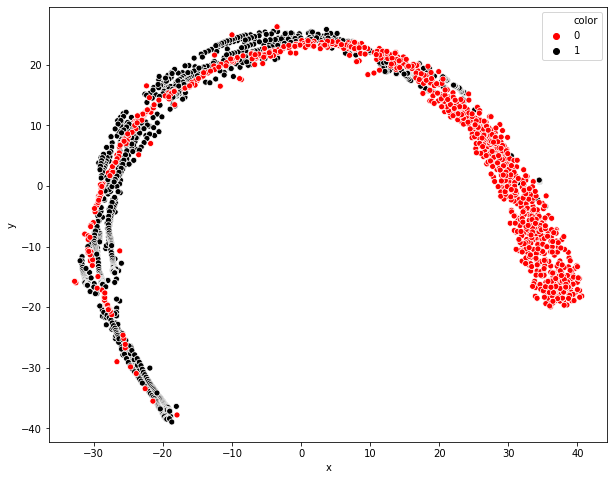

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
plot_df = pd.DataFrame(dict(x=x, y=y, color=labels))
sns.scatterplot('x', 'y', data=plot_df, hue='color', palette=['red','black'])

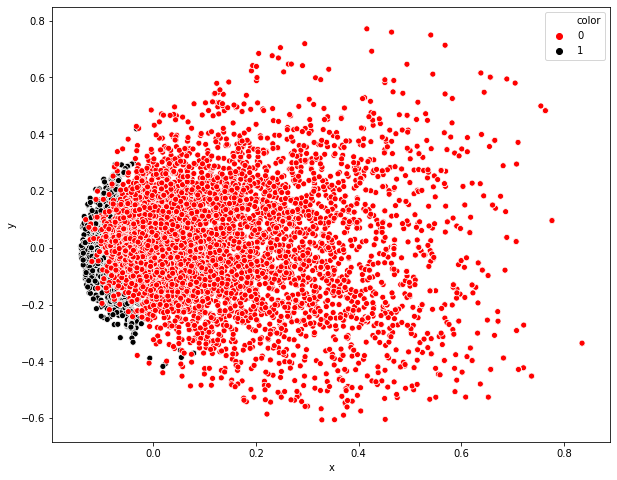

In [79]:
nentries = 10000

X = df[[f"bin{i}" for i in range(SIZE)]]
X = pd.concat([X[:nentries], X[-nentries:]])
# X_trans = StandardScaler().fit_transform(X)
# X_trans = MinMaxScaler().fit_transform(X)
X_trans = Normalizer().fit_transform(X)
# X_trans = LogNormalizer().fit_transform(X)

pca = PCA(n_components=2, random_state=0)
data2 = pca.fit_transform(X_trans)
x2 = data2[:,0]
y2 = data2[:,1]
labels = pd.concat([df['ispeak'][:nentries], df['ispeak'][-nentries:]]).values
fig, ax = plt.subplots(figsize=(10,8))
plot_df2 = pd.DataFrame(dict(x=x2, y=y2, color=labels))
sns.scatterplot('x', 'y', data=plot_df2, hue='color', palette=['red','black'])

In [80]:
X = df[[f"bin{i}" for i in range(SIZE)]].to_numpy()
X = Normalizer().fit_transform(X)
y = df['ispeak'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

In [81]:
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [82]:
gbc.score(X_test, y_test)

0.9749584054870802

In [83]:
y_test.shape

(58902,)

In [84]:
y_pred = gbc.predict_proba(X_test)
y_pred, y_pred.ravel()[1::2]

(array([[0.02874989, 0.97125011],
        [0.99342834, 0.00657166],
        [0.99216714, 0.00783286],
        ...,
        [0.01820868, 0.98179132],
        [0.0253938 , 0.9746062 ],
        [0.98972812, 0.01027188]]),
 array([0.97125011, 0.00657166, 0.00783286, ..., 0.98179132, 0.9746062 ,
        0.01027188]))

In [85]:
y_pred = gbc.predict(X_test)
y_pred

array([1, 0, 0, ..., 1, 1, 0])

Text(0, 0.5, 'Truth')

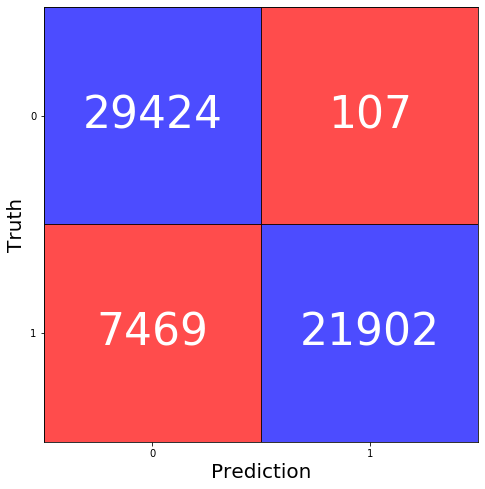

In [98]:
from sklearn.metrics import confusion_matrix
import matplotlib.patches as patches

y_pred = gbc.predict(X_test)
mat = confusion_matrix(y_test, y_pred)

threshold = 0.95
y_prob = gbc.predict_proba(X_test)[:, 1]
y_pred = (y_prob >= threshold).astype('int')
mat = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(12,8))

ax.set_xticks([0,1])
ax.set_yticks([0,1])
ax.set_xlabel("Prediction", fontsize=20)
ax.set_ylabel("Truth", fontsize=20)

im = ax.imshow(mat, cmap='Blues', alpha=0.0)

ax.add_patch(patches.Rectangle((-0.5, -0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='blue', alpha=0.7))
ax.add_patch(patches.Rectangle((0.5, 0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='blue', alpha=0.7))
ax.add_patch(patches.Rectangle((-0.5, 0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='red', alpha=0.7))
ax.add_patch(patches.Rectangle((0.5, -0.5), 1, 1, linewidth=1, edgecolor='k', facecolor='red', alpha=0.7))

tn, fp, fn, tp = mat.ravel()

fontsize = 44
fontcolor = 'w'
tn_text = ax.text(0, 0, tn, ha="center", va="center", color=fontcolor, fontsize=fontsize)
fp_text = ax.text(1, 0, fp, ha="center", va="center", color=fontcolor, fontsize=fontsize) 
fn_text = ax.text(0, 1, fn, ha="center", va="center", color=fontcolor, fontsize=fontsize) 
tp_text = ax.text(1, 1, tp, ha="center", va="center", color=fontcolor, fontsize=fontsize) 

plt.xlabel("Prediction")
plt.ylabel("Truth")

In [87]:
from sklearn.metrics import roc_curve, auc, classification_report

y_pred_prob = gbc.predict_proba(X_test).ravel()[1::2]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_model = auc(fpr, tpr)
auc_model

0.9955957370446983

In [91]:
gbc.predict_proba(Normalizer().fit_transform([[10, 10, 0, 20, 0, 1, 40, 8,0, 0, 0, 0, 0]]))[0][1]

0.026497721360652666

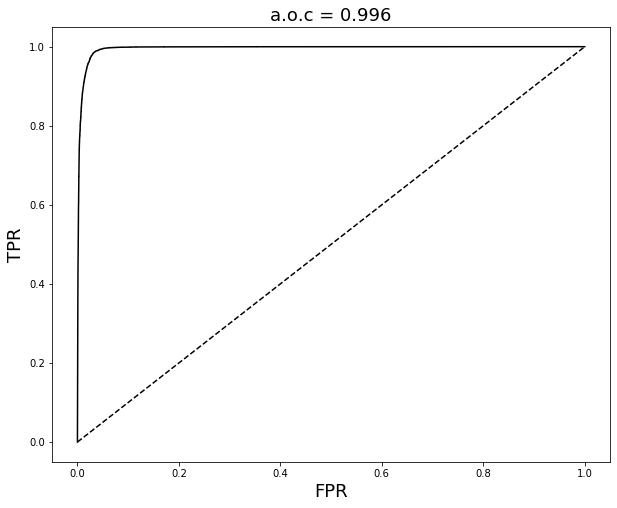

In [89]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FPR', fontsize=18)
plt.ylabel('TPR', fontsize=18)
plt.title(f'a.o.c = {auc_model:.3f}', fontsize=18)
plt.plot(fpr, tpr, 'k')

In [93]:
a1 = [ 456,  510,  647,  820,  979, 1021, 1028,  758,  598,  502,  413,
        419,  381, 78, 90, 231]
Normalizer().fit_transform([a1[7-6:7+7]])

array([[0.20665697, 0.2621707 , 0.33227198, 0.39670033, 0.41371914,
        0.41655561, 0.30714898, 0.24231542, 0.20341529, 0.16735162,
        0.16978288, 0.15438491, 0.03160636]])

In [94]:
from tqdm import tqdm_notebook as tqdm
import peakingduck as pkd

# compare against one of the reference spectra
class GradientBoostFinder(pkd.core.IPeakFinder):
    """
        A peak finder based on the gradient boosting classifier
    """   
    def __init__(self, bins=13):
        self.bins = bins
        self._offset = bins//2

    def find(self, data, *args, **kwargs):
        threshold = 0.55
        if 'threshold' in kwargs:
            threshold = kwargs['threshold']

        # 13 bins
        # start at bin 7
        start = self._offset +1
        stop = len(data)-start-1

        # find peaks
        peaks = []
        ndata = np.array(data)
        for i, value in tqdm(enumerate(ndata)):
            if i < start:
                continue
            if i > stop and i > 0:
                continue
                
            normed_data = Normalizer().fit_transform([ndata[i-self._offset:i+self._offset+1]])
            # prob it is a peak
            y_pred_prob = gbc.predict_proba(normed_data)[0][1]

            if y_pred_prob >= threshold:
                peaks.append(pkd.core.PeakInfo(i, value))
            
        return peaks

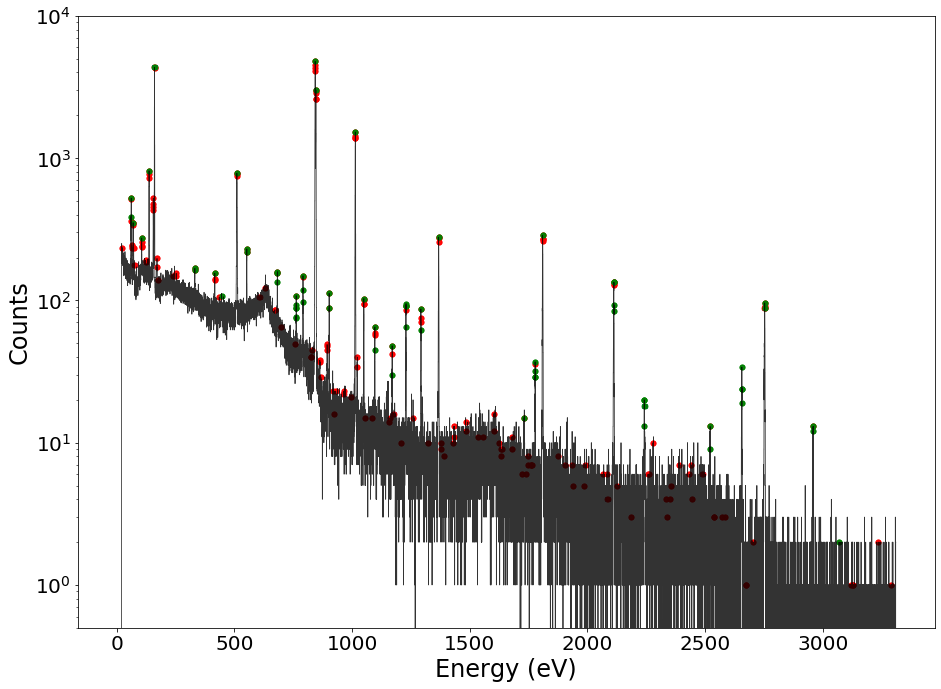

In [101]:
# change the filename here for a given spectrum
filename = os.path.join('..', 'reference', 'spectrum0.csv')

# read in from csv file
hist_raw = pkd.core.SpectrumEnergyBased()
pkd.io.from_csv(hist_raw, filename)
energies, counts = hist_raw.X, hist_raw.Y

pf = GradientBoostFinder(bins=13)
pf2 = pkd.core.WindowPeakFinder(threshold=2.0, nouter=80, ninner=3, enforce_maximum=True)

peaks = pf.find(counts, threshold=0.93)
peaks2 = pf2.find(counts)

# plot the histogram and peaks
import peakingduck.plotting as pkdplot

f, ax = pkdplot.PLT.subplots(1, figsize=(14,10))

for peak in peaks:
#     print("{1} @ {0} eV".format(energies[peak.index], peak.value))
    marker = pkdplot.PLT.Line2D((energies[peak.index], energies[peak.index+1]), 
                                (peak.value, peak.value), lw=5., 
                                ls='-', marker='.', 
                                markersize=10, 
                                markerfacecolor='r', 
                                markeredgecolor='r', 
                                alpha=0.8)
    ax.add_line(marker)
    
for peak in peaks2:
#     print("{1} @ {0} eV".format(energies[peak.index], peak.value))
    marker = pkdplot.PLT.Line2D((energies[peak.index], energies[peak.index+1]), 
                                (peak.value, peak.value), lw=5., 
                                ls='-', marker='.', 
                                markersize=10, 
                                markerfacecolor='g', 
                                markeredgecolor='g', 
                                alpha=0.8)
    ax.add_line(marker)

pkdplot.PLT.semilogy(*pkdplot.getplotvalues(energies, counts), 'k', linewidth=0.8, alpha=0.8, label="raw")
pkdplot.PLT.ylim(bottom=0.5, top=1e4)
pkdplot.PLT.xlabel("Energy (eV)", fontsize=24)
pkdplot.PLT.ylabel("Counts", fontsize=24)
pkdplot.PLT.tick_params(axis='both', which='major', labelsize=20)
pkdplot.PLT.tick_params(axis='both', which='minor', labelsize=20)
# spacing
pkdplot.PLT.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=0.97, wspace=0.2, hspace=0.2)
# plt.savefig('sample.png')
pkdplot.PLT.show()